# Display Images
- This notebook will display adversarial/counterfactual images.

In [1]:
!source  ../CFE/bin/activate
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms as T
from wilds import get_dataset

In [ ]:
data_dir = '../SCRATCH'
pert_data_dir = '../SCRATCH/CFE_datasets'
models_dir = '../SCRATCH/CFE_models'
seed = 10
comb_nat_pert = False
percentage = 20

In [ ]:
assert seed in [10, 20, 40], f"{seed} not in [10,20, 40]"
assert percentage in [20, 50], f"{percentage} not in [20, 50]"

In [2]:
transform = T.Compose([
                T.Resize(256),
                T.CenterCrop(224),
                T.ToTensor()
                
            ])

# WaterBirds Dataset

Loading Original perturbed image...
{'background': [' land', 'water'], 'y': [' landbird', 'waterbird'], 'from_source_domain': [False, True]}
Label: 1


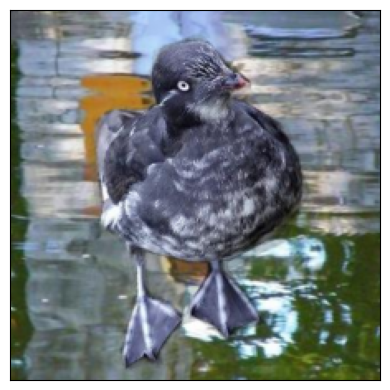

Loading L2 perturbed image...
Label: 0


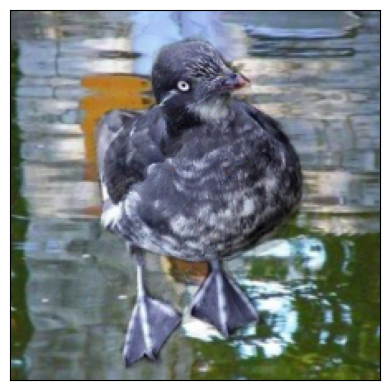

Loading Linf perturbed image...
Label: 0


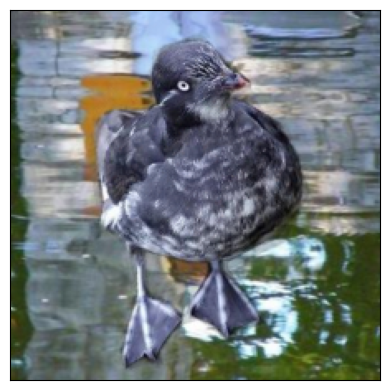

Loading GDPR_CFE perturbed image...
Label: 0


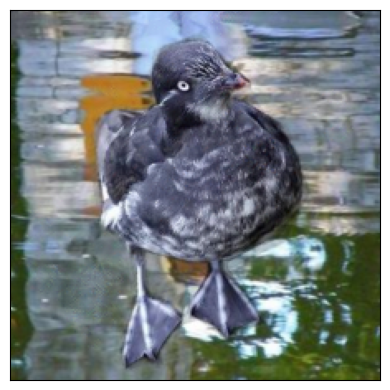

Loading SCFE perturbed image...
Label: 0


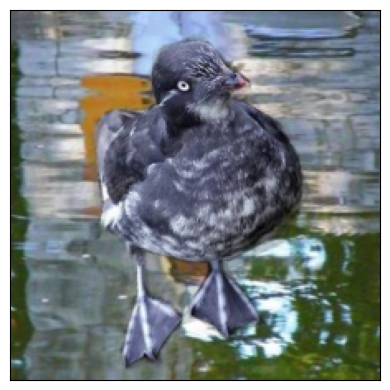

In [ ]:
modes=['Original', 'L2', 'Linf', 'GDPR_CFE','SCFE']
sample_idx = 125

for mode in modes:
    print(f'Loading {mode} perturbed image...')
    plt.figure(figsize=(4,4))

    if mode in ['L2', 'Linf', 'GDPR_CFE', 'SCFE']:
        if not comb_nat_pert:
            pert_data = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}', weights_only=False)['adv_data']
            pert_label = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}', weights_only=False)['adv_labels']
        else:
            pert_data = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}', weights_only=False)['adv_data']
            pert_label = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}', weights_only=False)['adv_labels']
        
        pert_image = pert_data[sample_idx]
        pert_label = pert_label[sample_idx]
    elif mode == 'Original':
        dataset = get_dataset(dataset="waterbirds", download=False, root_dir=data_dir)
        pert_data = dataset.get_subset("train", transform=transform)
        print(pert_data.metadata_map)
        pert_image = pert_data[sample_idx][0]
        pert_label = pert_data[sample_idx][1]
    else:
        raise NotImplementedError
    print(f'Label: {pert_label.item()}')
    file_save_name = f'./results/perturbed_images/WaterBirds_{mode}_seed_{seed}_sample_idx_{sample_idx}.png' if not comb_nat_pert \
    else f'./results/perturbed_images/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}_sample_idx_{sample_idx}.png'

    plt.imshow(np.transpose(pert_image.numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(file_save_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


Loading Original perturbation...
Label: 1


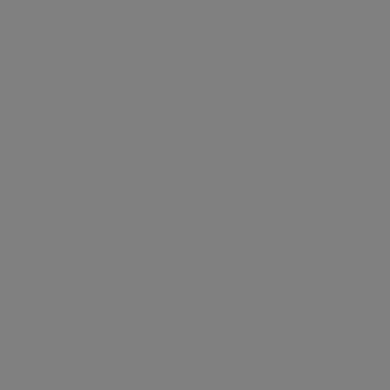

Loading L2 perturbation...
Label: 0


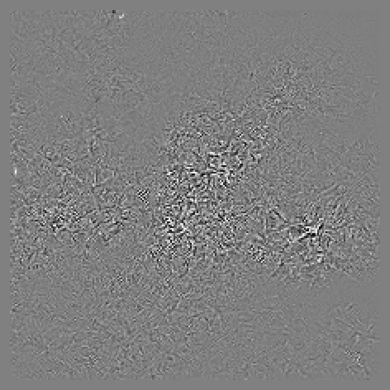

Loading Linf perturbation...
Label: 0


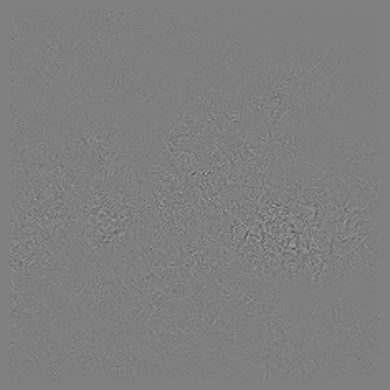

Loading GDPR_CFE perturbation...
Label: 0


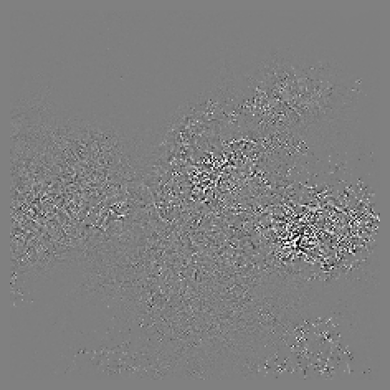

Loading SCFE perturbation...
Label: 0


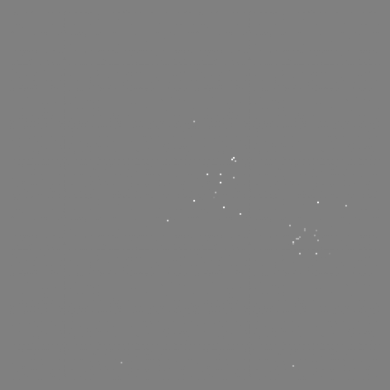

In [ ]:
modes=['Original', 'L2', 'Linf', 'GDPR_CFE','SCFE']
sample_idx = 100

dataset = get_dataset(dataset="waterbirds", download=False, root_dir=data_dir)
orig_data = dataset.get_subset("train", transform=transform)
orig_image = orig_data[sample_idx][0]

for mode in modes:

    fig = plt.figure(figsize=(4, 4), facecolor='#808080')  # Medium gray background
    ax = plt.gca()
    ax.set_facecolor('#f0f0f0')  # Set axes background to gray too

    print(f'Loading {mode} perturbation...')
    
    if mode in ['L2', 'Linf', 'GDPR_CFE', 'SCFE']:
        if not comb_nat_pert:
            pert_data = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}', weights_only=False)['adv_data']
            pert_label = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}', weights_only=False)['adv_labels']
        else:
            pert_data = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}', weights_only=False)['adv_data']
            pert_label = torch.load(f'{pert_data_dir}/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}', weights_only=False)['adv_labels']
        pert_image = pert_data[sample_idx]
        pert_label = pert_label[sample_idx]
    elif mode == 'Original':
        dataset = get_dataset(dataset="waterbirds", download=False, root_dir=data_dir)
        pert_data = dataset.get_subset("train", transform=transform)
        pert_image = pert_data[sample_idx][0]
        pert_label = pert_data[sample_idx][1]
    else:
        raise NotImplementedError
    print(f'Label: {pert_label.item()}')
    perturbation_magnfd = (pert_image - orig_image)
    perturbation_magnfd = perturbation_magnfd.mean(dim=0).unsqueeze(0)

    file_save_name = f'./results/perturbed_images/WaterBirds_{mode}_seed_{seed}_perturbation_sample_idx_{sample_idx}.png' if not comb_nat_pert \
    else f'./results/perturbed_images/WaterBirds_{mode}_seed_{seed}_percentage_{percentage}_perturbation_sample_idx_{sample_idx}.png'

    plt.imshow(np.transpose(perturbation_magnfd.numpy()*40, (1, 2, 0)),vmin=-1,vmax=1,cmap='gray')
    plt.xticks([])
    plt.yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(file_save_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()